In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
df = pd.read_csv('recording_export_3266351_3314644_2022-12-14T17-29-05.csv') 
print(df)

                                         Recording URL  Publicly Shared  \
0    https://insights.hotjar.com/r?site=3266351&rec...             True   
1    https://insights.hotjar.com/r?site=3266351&rec...            False   
2    https://insights.hotjar.com/r?site=3266351&rec...            False   
3    https://insights.hotjar.com/r?site=3266351&rec...            False   
4    https://insights.hotjar.com/r?site=3266351&rec...            False   
..                                                 ...              ...   
579  https://insights.hotjar.com/r?site=3266351&rec...            False   
580  https://insights.hotjar.com/r?site=3266351&rec...            False   
581  https://insights.hotjar.com/r?site=3266351&rec...            False   
582  https://insights.hotjar.com/r?site=3266351&rec...            False   
583  https://insights.hotjar.com/r?site=3266351&rec...            False   

     Already Watched  Comments  Labels              Created New / Returning  \
0               True

In [4]:
df.head()

,Recording URL,Publicly Shared,Already Watched,Comments,Labels,Created,New / Returning,Hotjar User ID,Country,Action Count,...,Browser,Operating System,Referrer URL,Landing Page URL,Exit Page URL,Rage Clicked,U-Turned,Incoming Feedback,Net Promoter Score®,Events
0,https://insights.hotjar.com/r?site=3266351&rec...,True,True,NaN,NaN,2022-12-02T15:32:23,New user,bc57d727,ZA,55,...,Google,Ios,NaN,https://app.getbird.bio/recipe/gin-gle-bells-g...,https://app.getbird.bio/the_lean_girl?tab=recipes,False,True,NaN,NaN,NaN
1,https://insights.hotjar.com/r?site=3266351&rec...,False,True,NaN,NaN,2022-12-02T14:41:17,Returning user,5cc8abea,ZA,77,...,Safari,Ios,NaN,https://campaign-git-om-whatsapp-otp-sandeepk6...,https://campaign-git-om-whatsapp-otp-sandeepk6...,False,False,NaN,NaN,NaN
2,https://insights.hotjar.com/r?site=3266351&rec...,False,True,NaN,NaN,2022-12-04T09:06:45,New user,c5065b41,ZA,3,...,Chrome,Android,https://linktr.ee/,https://app.getbird.bio/the_flavourist?utm_med...,https://app.getbird.bio/the_flavourist?utm_med...,False,False,NaN,NaN,NaN
3,https://insights.hotjar.com/r?site=3266351&rec...,False,False,NaN,NaN,2022-12-04T10:02:47,New user,bf1f7067,ZA,4,...,Chrome,Ios,https://getbird.bio/,https://campaign-git-om-whatsapp-otp-sandeepk6...,https://campaign-git-om-whatsapp-otp-sandeepk6...,False,False,NaN,NaN,NaN
4,https://insights.hotjar.com/r?site=3266351&rec...,False,False,NaN,NaN,2022-12-04T10:35:23,New user,1834aad2,ZA,9,...,Instagram,Android,NaN,https://app.getbird.bio/the_lean_girl,https://app.getbird.bio/the_lean_girl,False,False,NaN,NaN,NaN


In [7]:
df1 = df.drop(['Recording URL', 'Publicly Shared' , 'Already Watched' , 'Comments' , 'Labels' ,'Created' , 'Rage Clicked','U-Turned','Incoming Feedback','Net Promoter Score®','Events','Device Screen Size'], axis='columns')
df1.head()

,New / Returning,Hotjar User ID,Country,Action Count,Page Count,Duration (seconds),Device,Browser,Operating System,Referrer URL,Landing Page URL,Exit Page URL
0,New user,bc57d727,ZA,55,14,126,Phone,Google,Ios,NaN,https://app.getbird.bio/recipe/gin-gle-bells-g...,https://app.getbird.bio/the_lean_girl?tab=recipes
1,Returning user,5cc8abea,ZA,77,11,232,Phone,Safari,Ios,NaN,https://campaign-git-om-whatsapp-otp-sandeepk6...,https://campaign-git-om-whatsapp-otp-sandeepk6...
2,New user,c5065b41,ZA,3,1,13,Phone,Chrome,Android,https://linktr.ee/,https://app.getbird.bio/the_flavourist?utm_med...,https://app.getbird.bio/the_flavourist?utm_med...
3,New user,bf1f7067,ZA,4,1,3,Phone,Chrome,Ios,https://getbird.bio/,https://campaign-git-om-whatsapp-otp-sandeepk6...,https://campaign-git-om-whatsapp-otp-sandeepk6...
4,New user,1834aad2,ZA,9,6,16,Phone,Instagram,Android,NaN,https://app.getbird.bio/the_lean_girl,https://app.getbird.bio/the_lean_girl


In [8]:
df1.shape

(584, 12)

In [9]:
df.describe()

,Comments,Labels,Action Count,Page Count,Duration (seconds),Incoming Feedback,Net Promoter Score®
count,0.0,0.0,584.000000,584.000000,584.000000,0.0,0.0
mean,NaN,NaN,14.803082,3.481164,94.174658,NaN,NaN
std,NaN,NaN,14.973754,3.190303,206.865317,NaN,NaN
min,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN
25%,NaN,NaN,5.000000,1.000000,25.000000,NaN,NaN
50%,NaN,NaN,10.000000,3.000000,55.000000,NaN,NaN
75%,NaN,NaN,21.000000,4.000000,103.000000,NaN,NaN
max,NaN,NaN,148.000000,30.000000,3730.000000,NaN,NaN


In [10]:
df1.isnull().sum()

New / Returning         0
Hotjar User ID          0
Country                 1
Action Count            0
Page Count              0
Duration (seconds)      0
Device                  0
Browser                 0
Operating System        0
Referrer URL          168
Landing Page URL        0
Exit Page URL           0
dtype: int64

In [11]:
df2 = df1.dropna()

In [12]:
df2.isnull().sum()

New / Returning       0
Hotjar User ID        0
Country               0
Action Count          0
Page Count            0
Duration (seconds)    0
Device                0
Browser               0
Operating System      0
Referrer URL          0
Landing Page URL      0
Exit Page URL         0
dtype: int64

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 2 to 583
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   New / Returning     415 non-null    object
 1   Hotjar User ID      415 non-null    object
 2   Country             415 non-null    object
 3   Action Count        415 non-null    int64 
 4   Page Count          415 non-null    int64 
 5   Duration (seconds)  415 non-null    int64 
 6   Device              415 non-null    object
 7   Browser             415 non-null    object
 8   Operating System    415 non-null    object
 9   Referrer URL        415 non-null    object
 10  Landing Page URL    415 non-null    object
 11  Exit Page URL       415 non-null    object
dtypes: int64(3), object(9)
memory usage: 42.1+ KB


In [16]:
df2.columns

Index(['New / Returning', 'Hotjar User ID', 'Country', 'Action Count',
       'Page Count', 'Duration (seconds)', 'Device', 'Browser',
       'Operating System', 'Referrer URL', 'Landing Page URL',
       'Exit Page URL'],
      dtype='object')

In [17]:
df2.nunique()

New / Returning         2
Hotjar User ID        396
Country                 6
Action Count           51
Page Count             15
Duration (seconds)    161
Device                  3
Browser                 5
Operating System        3
Referrer URL           13
Landing Page URL      302
Exit Page URL         198
dtype: int64

In [19]:
df.duplicated().sum()

0

<AxesSubplot:>

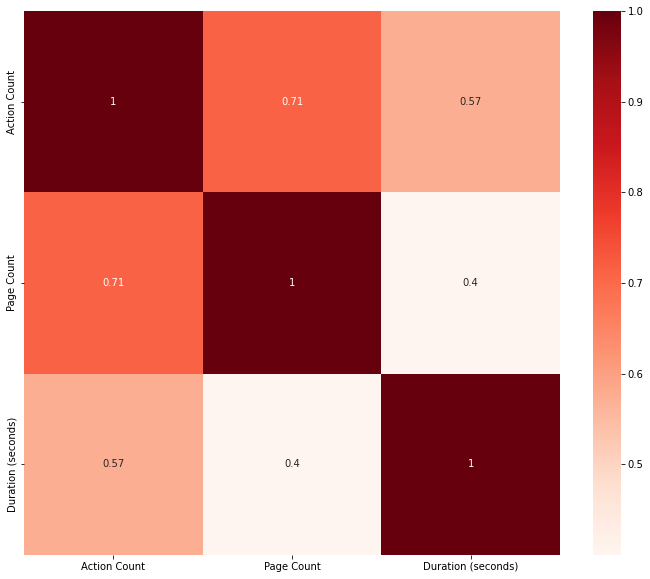

In [22]:
corr = df2.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cmap='Reds')

<AxesSubplot:xlabel='New / Returning', ylabel='count'>

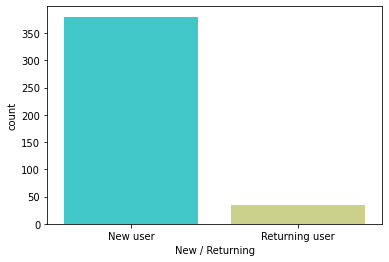

In [25]:
sns.countplot(x = 'New / Returning',data = df2, palette = 'rainbow')

In [27]:
df2['Landing Page URL'].value_counts()

https://app.getbird.bio/the_lean_girl                                                                         106
https://app.getbird.bio/the_flavourist                                                                          3
https://app.getbird.bio/the_lean_girl?fbclid=IwAR1eYSPvNuVzS6lGi4PyC7SM-BVIX43PYZbUfllspNY2sW2yC-C4LhxBAe0      2
https://app.getbird.bio/recipe/gin-gle-bells-grapefruit-cocktail                                                2
https://app.getbird.bio/recipe/cheesy-low-calorie-veggie-bake                                                   2
                                                                                                             ... 
https://app.getbird.bio/the_lean_girl?fbclid=PAAaZuVhTvzVSz5iolwf6Nc7WGl_MB4qamVCfgw6o7aQydigqfZ-mtgQnclxE      1
https://app.getbird.bio/the_lean_girl?fbclid=IwAR1gzk5VMfG2rX_4srsUBwB_bwW0tIGs-lk6hWh-0kVn-O94c4qSURPTau8      1
https://app.getbird.bio/the_lean_girl?fbclid=PAAaZPIOwCR15Rlp4mMtaZyYPSoMri7v58L1Mz-oUYi

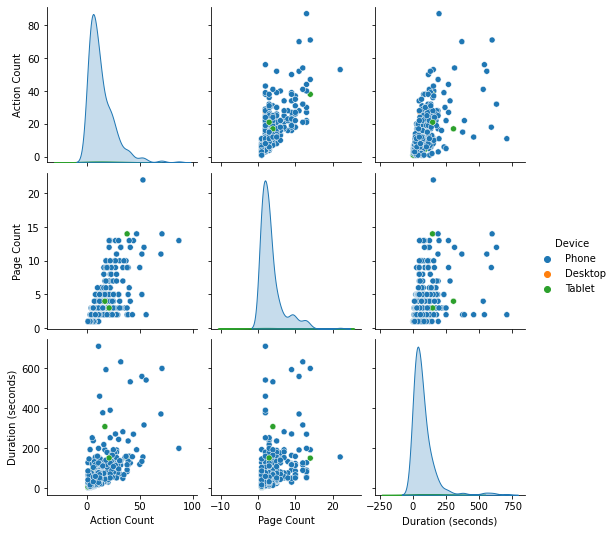

In [30]:
sns.pairplot(df2,hue='Device')

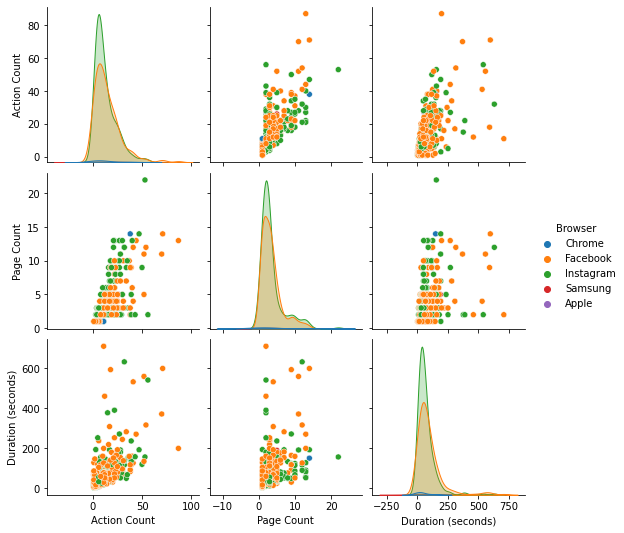

In [35]:
sns.pairplot(df2,hue='Browser')

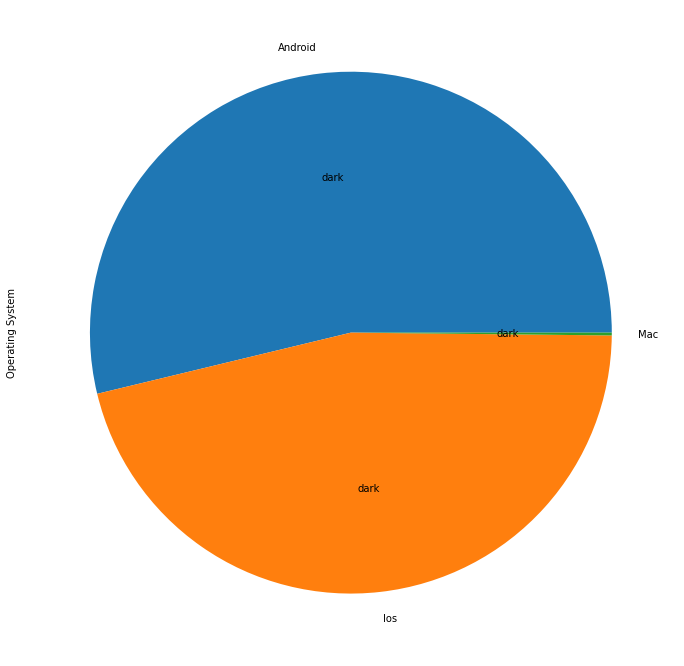

In [38]:
plt.figure(figsize=(15,12))
df['Operating System'].value_counts().plot.pie(autopct='dark')
plt.show()

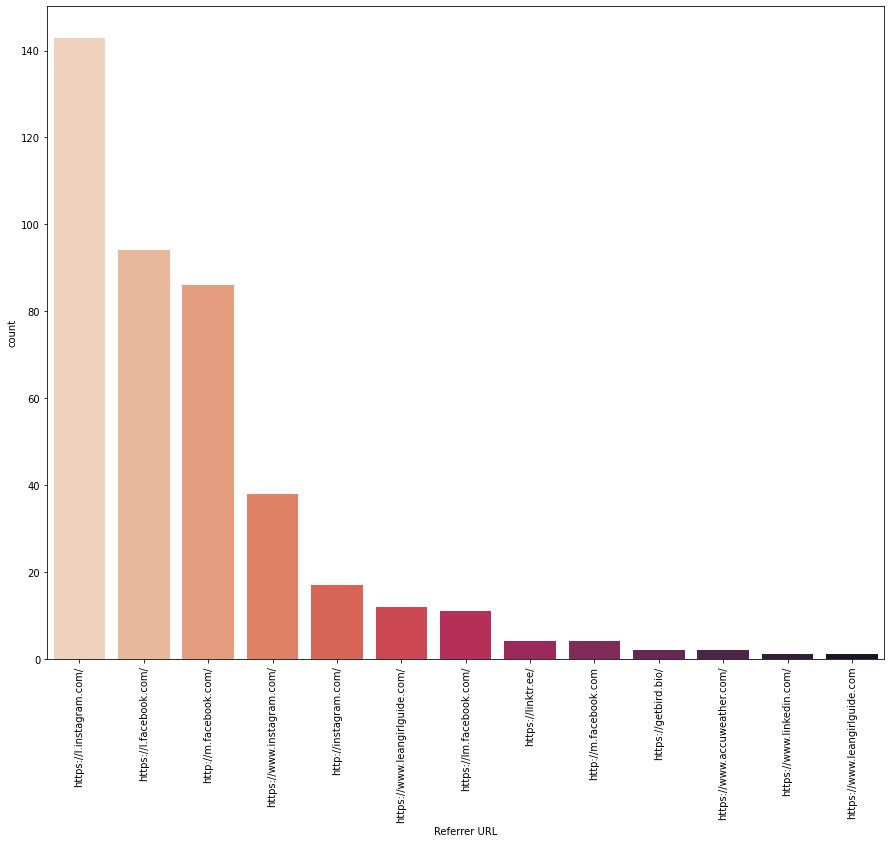

In [43]:
plt.figure(figsize=(15,12))
sns.countplot(x='Referrer URL',data=df2,palette='rocket_r',order=df2['Referrer URL'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

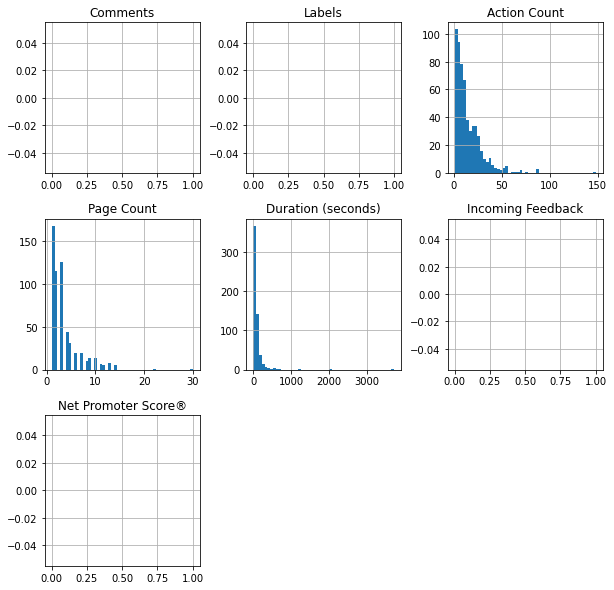

In [44]:
df.hist(figsize=(10,10),bins=50)
plt.show()

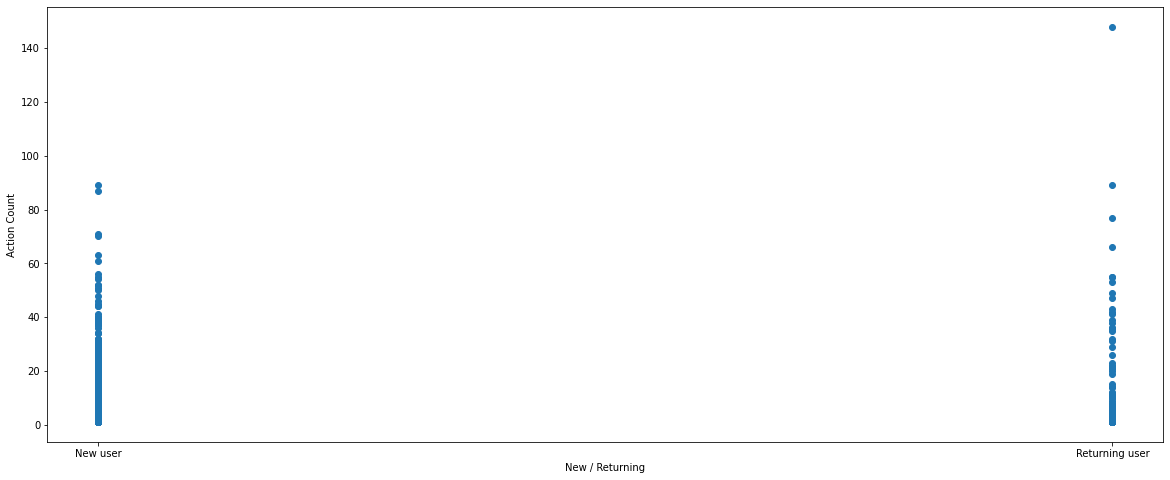

In [45]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(df['New / Returning'],df['Action Count'])
ax.set_xlabel('New / Returning')
ax.set_ylabel('Action Count')
plt.show()

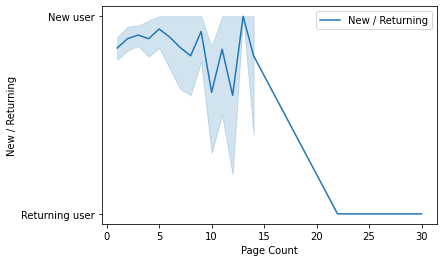

In [47]:
sns.lineplot(x='Page Count',y='New / Returning',label='New / Returning',data=df)
plt.legend()
plt.show()

In [48]:
import sweetviz as sv

c:\users\jmd\appdata\local\programs\python\python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [49]:
report=sv.analyze(df)

Done! Use 'show' commands to display/save.   |█████████████████████████████████████████████████| [100%]   00:00 -> (00:00 left)


In [50]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
